In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import datetime, timedelta 

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
 engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
 # We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
 # Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Return Columns 

inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [ ]:
columns = inspector.get_columns(measurement)
for c in columns: 
    print =(c['name'], c['type'])

In [ ]:
columns_2 = inspector.get_columns(measurement)
for c in columns_2: 
    print =(c['name'], c['type'])

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database

first_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
first_date

last_year =  dt.datetime.strptime(first_date, '%Y-%m-%d') - dt.timedelta(days=365)
last_year

# Strftime used to format a time string, and denoting the columnn and table to pull from
# Ex. (dt.datetime.strftime(format, table.column)
# last_year = dt.datetim.strftime('%Y-%m-%d', measurement.date) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

prcp = session.query(Measurement.date, func.avg(Measurement.prcp)).\
            filter(Measurement.date >= last_year).\
            group_by(Measurement.date).all()
prcp

[('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 0.19499999999999998),
 ('2016-09-22', 

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Specficy the table you want to draw from 
# Columns = [Will name the columns found in the df whatever is passed in the brackets]

prcp_df = pd.DataFrame(prcp, columns=['Date', 'Precipitation'])                  
prcp_df.set_index('Date', inplace=True)
prcp_df.head()
# prcp_df.head()

# Sort the dataframe by date

prcp_df = prcp_df.sort_values('Date', ascending=False)
prcp_df

,Precipitation
Date,
2017-08-23,0.132500
2017-08-22,0.166667
2017-08-21,0.193333
2017-08-20,0.005000
2017-08-19,0.030000
2017-08-18,0.020000
2017-08-17,0.047500
2017-08-16,0.152500
2017-08-15,0.164000


<function matplotlib.pyplot.show(*args, **kw)>

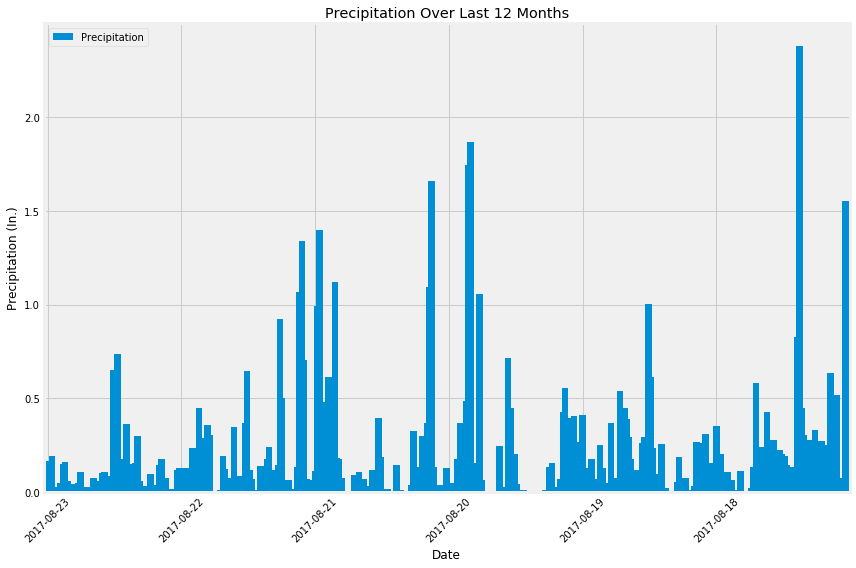

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot(kind='bar', width=3, figsize=(12,8))
plt.title("Precipitation Over Last 12 Months")
plt.ylabel("Precipitation (In.)")
plt.xlabel("Date")
plt.locator_params(axis='x', nbins=6)
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Output/PrecipitationOverTime.png")
plt.show 
           

In [14]:
# prcp_df.plot(kind='bar', width=3, figsize=(12,8))
# plt.locator_params(axis='x', nbins=6)
# ax.xaxis.set_major_formatter(plt.NullFormatter())
# ax.grid(True)

In [15]:
 # Use Pandas to calculate the summary statistics for the precipitation data

prcp_df.describe()

,Precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [16]:
 # Design a query to show how many stations are available in this dataset

session.query(Station.id).count()

9

In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order

active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the station id from the previous query
# Calculate the lowest temperature recorded, highest temperature recorded, and average temperature of the most active station


top_station = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
             filter(Measurement.station == 'USC00519281').all()

top_station

[(54.0, 71.66378066378067, 85.0)]

In [19]:
# Choose the station with the highest number of temperature observations

high_temps = session.query(Measurement.station, func.count(Measurement.tobs)).\
                group_by(Measurement.station).filter(Measurement.date >= last_year).\
                order_by(func.count(Measurement.station).desc()).all()     

high_temps

[('USC00519397', 360),
 ('USC00519281', 351),
 ('USC00516128', 348),
 ('USC00513117', 342),
 ('USC00519523', 336),
 ('USC00514830', 304),
 ('USC00517948', 182)]

In [20]:
# Query the last 12 months of temperature observation data for this station

hottest_station = session.query(Measurement.tobs).\
                filter(Measurement.station == 'USC00519397').all()

hottest_station

[(65.0),
 (63.0),
 (74.0),
 (76.0),
 (73.0),
 (70.0),
 (64.0),
 (68.0),
 (73.0),
 (64.0),
 (61.0),
 (66.0),
 (65.0),
 (68.0),
 (64.0),
 (72.0),
 (66.0),
 (66.0),
 (69.0),
 (67.0),
 (67.0),
 (71.0),
 (67.0),
 (76.0),
 (68.0),
 (72.0),
 (70.0),
 (67.0),
 (66.0),
 (67.0),
 (69.0),
 (67.0),
 (67.0),
 (64.0),
 (69.0),
 (73.0),
 (73.0),
 (69.0),
 (69.0),
 (69.0),
 (71.0),
 (61.0),
 (69.0),
 (63.0),
 (64.0),
 (65.0),
 (67.0),
 (68.0),
 (65.0),
 (76.0),
 (75.0),
 (66.0),
 (70.0),
 (72.0),
 (73.0),
 (70.0),
 (71.0),
 (72.0),
 (72.0),
 (69.0),
 (70.0),
 (73.0),
 (72.0),
 (73.0),
 (70.0),
 (71.0),
 (68.0),
 (70.0),
 (72.0),
 (69.0),
 (68.0),
 (74.0),
 (72.0),
 (72.0),
 (73.0),
 (74.0),
 (73.0),
 (73.0),
 (74.0),
 (74.0),
 (74.0),
 (71.0),
 (72.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (73.0),
 (73.0),
 (71.0),
 (71.0),
 (68.0),
 (70.0),
 (71.0),
 (74.0),
 (71.0),
 (75.0),
 (76.0),
 (75.0),
 (75.0),
 (76.0),
 (76.0),
 (76.0),
 (77.0),
 (77.0),
 (73.0),
 (74.0),
 (76.0),
 (76.0),
 (80.0),
 (74.0),
 

In [21]:
# Convert to dataframe

temp_df = pd.DataFrame(hottest_station, columns=['Temperature'])

temp_df.head()
                                        
#                        columns=['Temperature'])
# temp_df.set_index('Station', inplace=True).head()

,Temperature
0,65.0
1,63.0
2,74.0
3,76.0
4,73.0


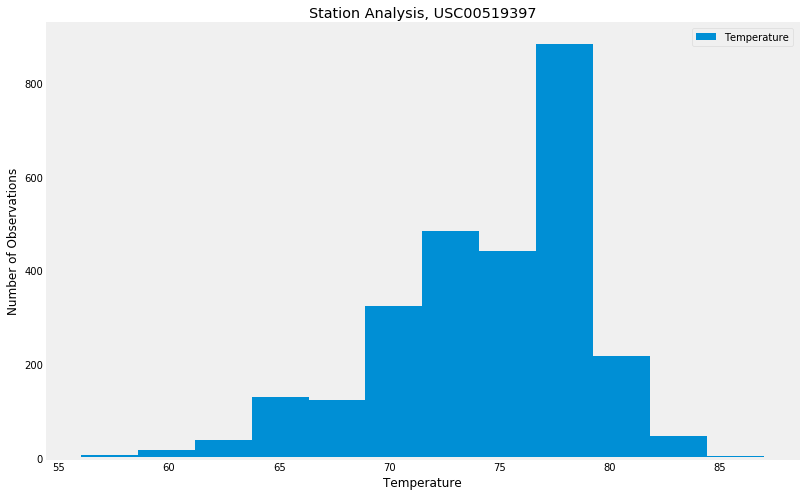

In [22]:
#  Plot the results as a histogram

temp_df.plot.hist(by='tobs', bins=12, figsize=(12,8))
plt.grid()
plt.title("Station Analysis, USC00519397")
plt.xlabel("Temperature")
plt.ylabel('Number of Observations')
# plt.legend(bbox_to_anchor=(1,1))
plt.savefig("Output/TempbyStation.png")

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# EX function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [24]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates

past_year_temps = (calc_temps('2017-04-26', '2017-05-05'))

past_year_temps


[(58.0, 73.44262295081967, 81.0)]

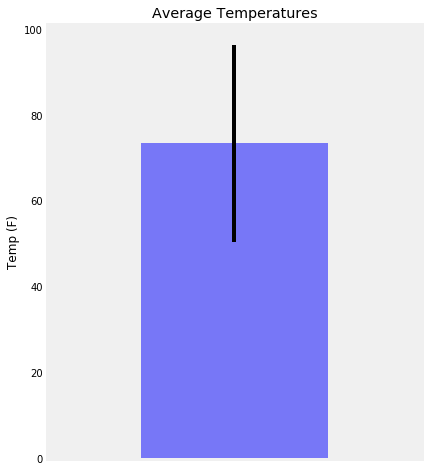

In [25]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

past_temps_df = pd.DataFrame(past_year_temps, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
avg_temp = past_temps_df['Avg Temp']
temps = past_temps_df.iloc[0]['Max Temp'] - past_temps_df.iloc[0]['Min Temp']
avg_temp.plot(kind='bar', yerr=temps, figsize=(6,8), alpha=0.5, color='blue')
plt.title("Average Temperatures")
plt.ylabel("Temp (F)")
plt.xticks([])
plt.grid()
plt.savefig("Output/AverageTemperatures.png")
plt.show()

In [29]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

def rainfall(start_date, end_date):
    return session.query(Measurement.station, func.sum(Measurement.prcp)).\
                filter(Measurement.date >= (start_date - dt.timedelta(days=365)).\
                filter(Measurement.date <= (end_date - dt.timedelta(days=365)).\
                group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()

SyntaxError: unexpected EOF while parsing (<ipython-input-29-0452bcac85db>, line 13)

In [47]:
# trip_start = dt.datetime(2017, 4, 26)
# trip_end = dt.datetime(2017, 5, 5)
# start_date = trip_start - last_year
# end_date = trip_end - last_year

sel = [Measurement.station, Station.name, func.sum(Measurement.prcp), Station.latitude, Station.longitude, Station.elevation]

rainfall_results = session.query(*sel).filter(Measurement.station == Station.station).\
                        filter(Measurement.date >= '2016-04-26').filter(Measurement.date <= '2016-05-05').\
                        group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()

rainfall_results

rainfall_results_df = pd.DataFrame(rainfall_results, columns=['Station', 'Name', 'Precipitation', 'Latitude', 'Longitude', 'Elevation'])
rainfall_results_df

,Station,Name,Precipitation,Latitude,Longitude,Elevation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",3.79,21.33310,-157.80250,152.4
1,USC00519281,"WAIHEE 837.5, HI US",1.53,21.45167,-157.84889,32.9
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",1.11,21.52130,-157.83740,7.0
3,USC00513117,"KANEOHE 838.1, HI US",0.84,21.42340,-157.80150,14.6
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",0.43,21.33556,-157.71139,19.5
5,USC00519397,"WAIKIKI 717.2, HI US",0.14,21.27160,-157.81680,3.0
6,USC00517948,"PEARL CITY, HI US",0.00,21.39340,-157.97510,11.9


In [48]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)
def daily(date):
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                filter(func.strftime("%m-%d", Measurement.date == date)).all()

daily('04-26')

[(53.0, 73.09795396419437, 87.0)]

In [83]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`\
# Set the start and end date of the trip
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date

start_date = '2017-04-26'
end_date = '2017-05-05'

trip_dates = session.query(Measurement.date).filter(Measurement.date >= start_date).\
                    filter(Measurement.date <= end_date).group_by(Measurement.date).all()

trip_dates

normals = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                filter((Measurement.date) >= start_date).\
                filter((Measurement.date) <= end_date).group_by(Measurement.date).all()

normals

[(74.0, 77.5, 81.0),
 (70.0, 75.57142857142857, 78.0),
 (67.0, 73.28571428571429, 77.0),
 (66.0, 69.83333333333333, 72.0),
 (58.0, 61.5, 64.0),
 (65.0, 72.0, 78.0),
 (73.0, 76.5, 79.0),
 (70.0, 75.6, 78.0),
 (74.0, 76.33333333333333, 78.0),
 (70.0, 76.33333333333333, 79.0)]

In [84]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

normals_df = pd.DataFrame(normals, columns = ['Min', 'Avg', 'Max'])
normals_df['date'] = trip_dates

normals_df.set_index('date', inplace=True)

normals_df

,Min,Avg,Max
date,,,
"(2017-04-26,)",74.0,77.500000,81.0
"(2017-04-27,)",70.0,75.571429,78.0
"(2017-04-28,)",67.0,73.285714,77.0
"(2017-04-29,)",66.0,69.833333,72.0
"(2017-04-30,)",58.0,61.500000,64.0
"(2017-05-01,)",65.0,72.000000,78.0
"(2017-05-02,)",73.0,76.500000,79.0
"(2017-05-03,)",70.0,75.600000,78.0
"(2017-05-04,)",74.0,76.333333,78.0


In [ ]:
# 

# normals_df['date'] = pd.to_datetime(normals_df['date'], format='%Y-%m-%d')

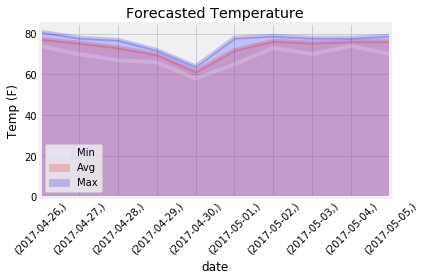

In [93]:
# Plot the daily normals as an area plot with `stacked=False`

colors = ['white', 'red', 'blue']

normals_df.plot(kind='area', alpha=.2,  stacked=False, x_compat=True, colors=colors, title='Forecasted Temperature', rot=45)
plt.ylabel('Temp (F)')
plt.tight_layout()
plt.savefig('Output/ForecastedTemperature.png')
plt.show()
